## Data Exploration

**1. Find our experiment records**

In [1]:
!rm data2/.DS_Store
from os import listdir
from os.path import isfile, join
data_raw = [f for f in listdir("data2") if isfile(join("data2", f))]
print(len(data_raw), "files:", str(data_raw))

7 files: ['46.8.csv', '21.8.csv', '18.3.csv', '53.8.csv', '58.6.csv', '19.7.csv', '39.1.csv']


**2. Save into a dictionary**

In [2]:
import csv
import numpy as np
data = {}
for experiment in data_raw:
    t, temp = [], []
    with open("data2/"+experiment) as csvfile:
        readCSV = csv.reader(csvfile, delimiter=',')
        for row in readCSV:
            t.append(int(row[0])/1e3)
            temp.append(float(row[1]))
        data[experiment[:-4]] = (np.array(t), np.array(temp))

**3. Plot**

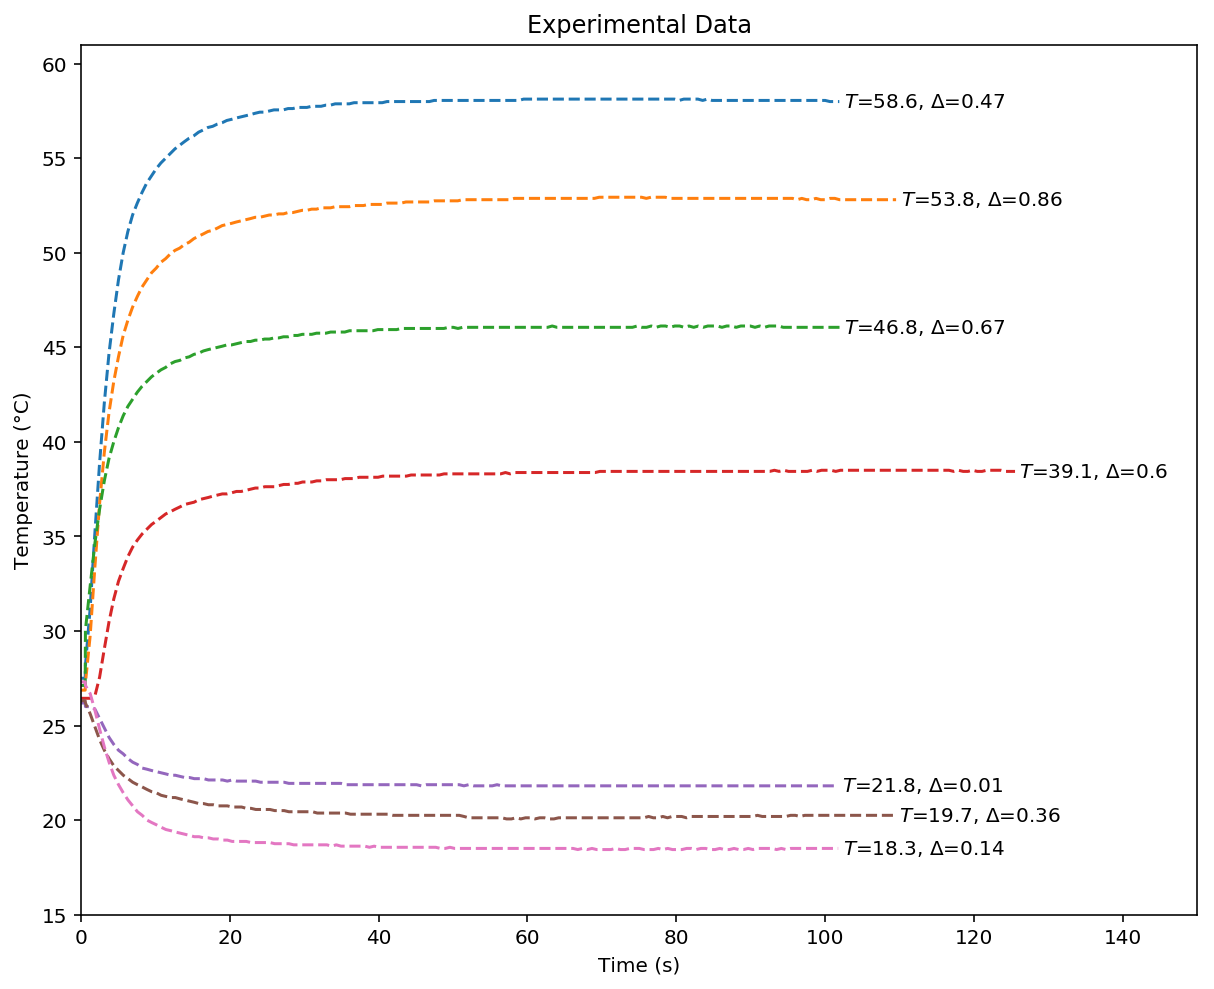

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
plt.figure(1, figsize=(10, 8))
plt.title("Experimental Data")
plt.xlabel("Time (s)")
plt.ylabel("Temperature (°C)")
plt.xticks(np.arange(0, 160, step=20))
plt.xlim(0,150)
plt.ylim(15,61)
plt.yticks(np.arange(15, 61, step=5))

ordered_experiments = list(data.keys())
ordered_experiments.sort()
for experiment in ordered_experiments[::-1]:
    t, temp = data[experiment]
    plt.plot(t, temp, '--', label=r"$T_i$="+experiment)
    if float(experiment) < 28:
        label = round(temp.min() - float(experiment), 2)
    else:
        label = round(float(experiment) - temp.max(), 2)
    plt.text(t[-1]+0.6,temp[-1]-0.3, r"$T$="+experiment+r", $\Delta$="+str(label))
    #plt.axhline(y=float(experiment), linestyle='--')
#plt.legend()
plt.show()

Equation: T = -3.121519595433576 *e^(-0.32035679079602286t+[[2.40621136]]) + [[48.46214025]]
Mean squared error: 0.003
Variance score: 0.994


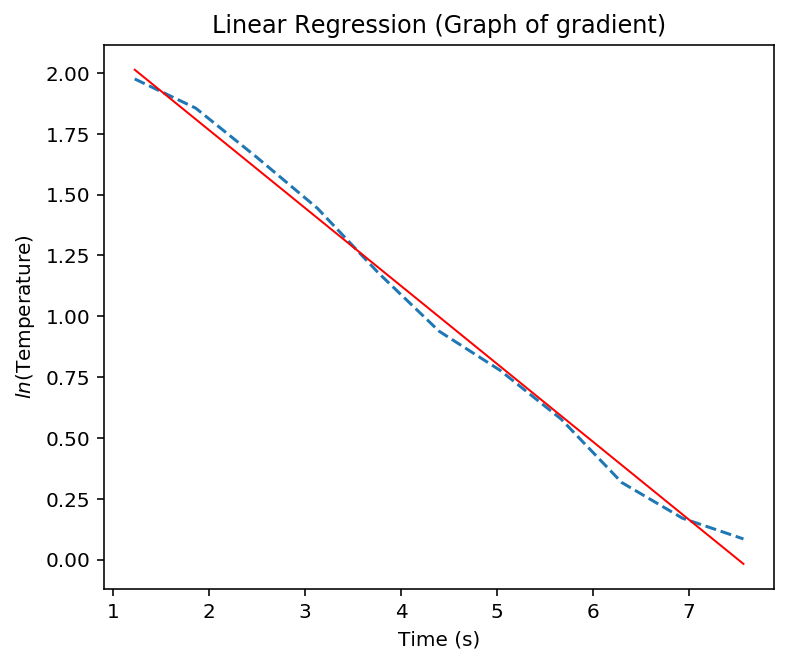

In [140]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from math import e

t, temp = data["46.8"]
exp_diff = []
t2 = []
indexes = []
for n, T in enumerate(temp[1:]):
    diff = (T - temp[n-1])/(t[n] - t[n-1])
    if diff>1 and diff<10:
        exp_diff.append(diff)
        t2.append(t[n])
        indexes.append(n)
t2, exp_diff = np.array(t2).reshape(-1, 1), np.array(exp_diff).reshape(-1, 1)

ln_exp_diff = np.log(exp_diff)

regr = LinearRegression()
regr.fit(t2, ln_exp_diff)
exp_diff_pred = regr.predict(t2)

n = indexes[int(len(indexes)/2)]
k = regr.coef_[0][0]
C = regr.predict([[0]])
D = temp[n] - (1/k)*e**(k * t[n] + C)

print("Equation: T =", 1/k, "*e^("+str(k)+"t+"+str(C)+")", "+", D)
print("Mean squared error: %.3f" % mean_squared_error(ln_exp_diff, exp_diff_pred))
print('Variance score: %.3f' % r2_score(ln_exp_diff, exp_diff_pred)) # 1 is perfect prediction

plt.figure(2, figsize=(6, 5))
plt.title("Linear Regression (Graph of gradient)")
plt.xlabel("Time (s)")
plt.ylabel(r"$ln$(Temperature)")
plt.plot(t2, ln_exp_diff, '--')
plt.plot(t2, exp_diff_pred, color='red', linewidth=1)
plt.show()

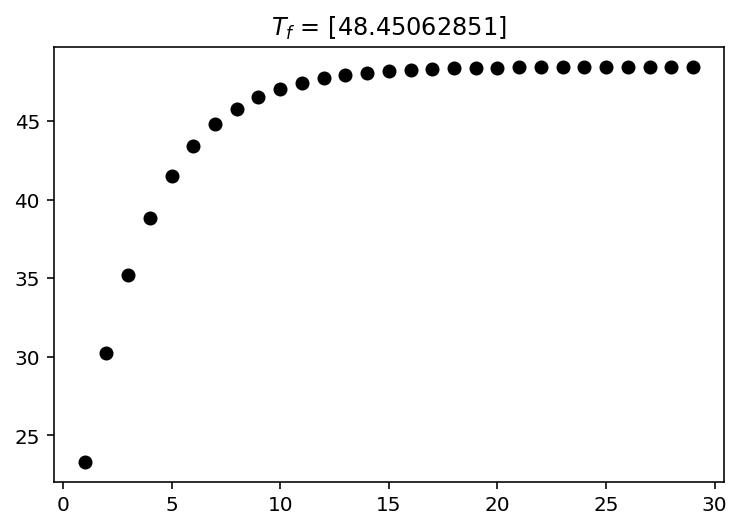

In [143]:
temp_pred = []
for t in range(1,30):
    temp = (1/k)*e**(k * t + C) + D
    temp_pred.append(temp)
    
plt.scatter(range(1,30), temp_pred, color='black')
plt.title(r"$T_f$ = " + str(temp_pred[-5][0]))
plt.show()

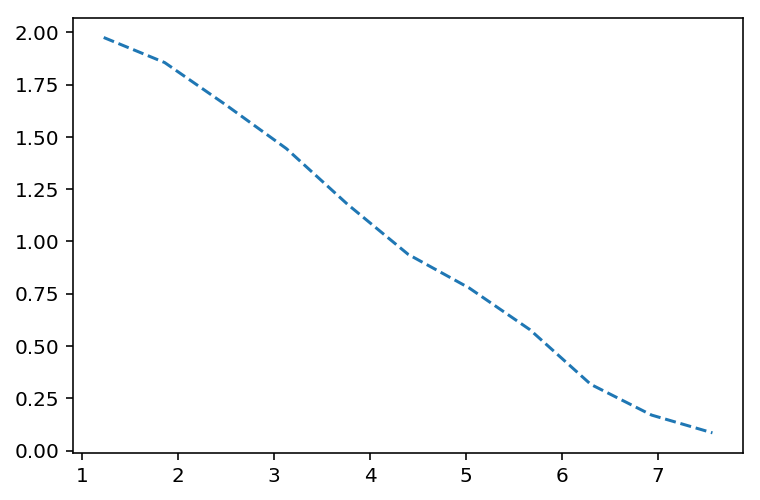

Final Prediction: 48.46196140964429 over 46.8


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in log
  


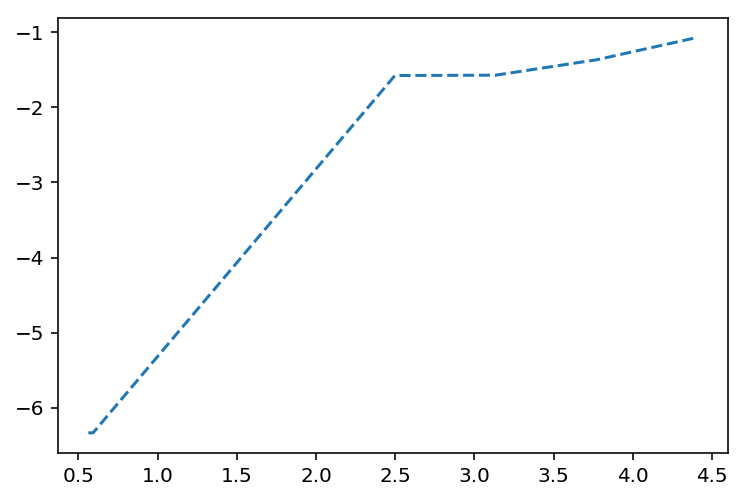

Final Prediction: 22597901.56039348 over 21.8


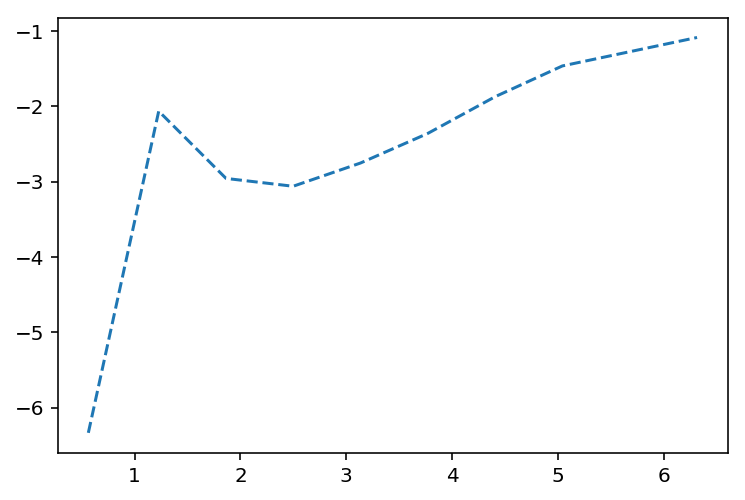

Final Prediction: 5976.203241421321 over 18.3


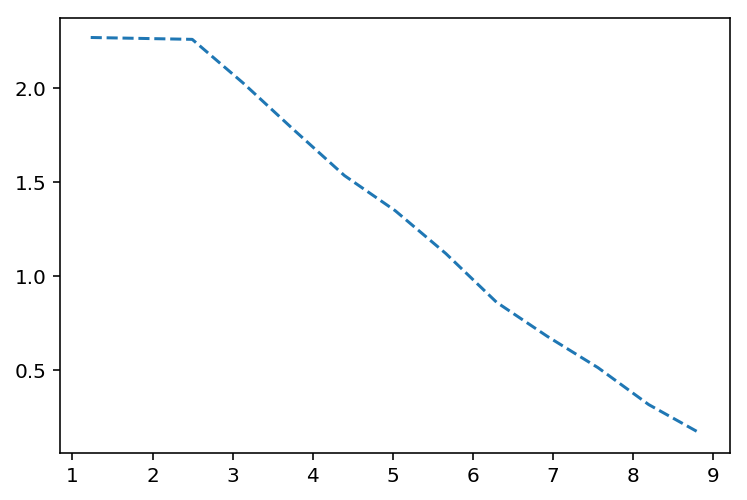

Final Prediction: 55.552786639224266 over 53.8


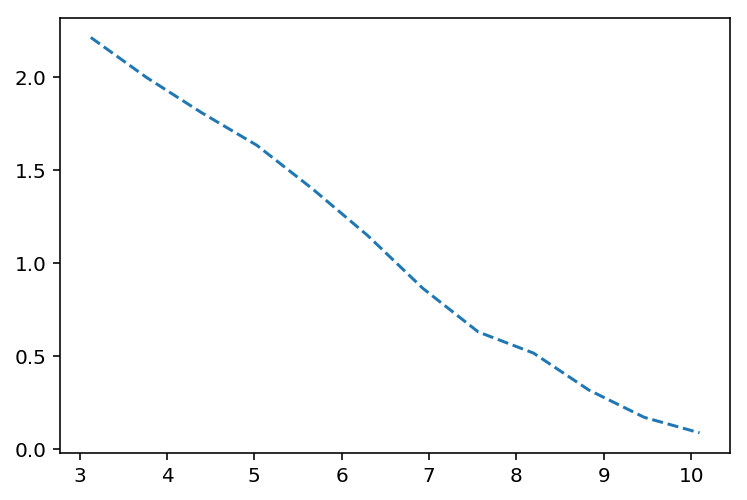

Final Prediction: 60.11048158286313 over 58.6


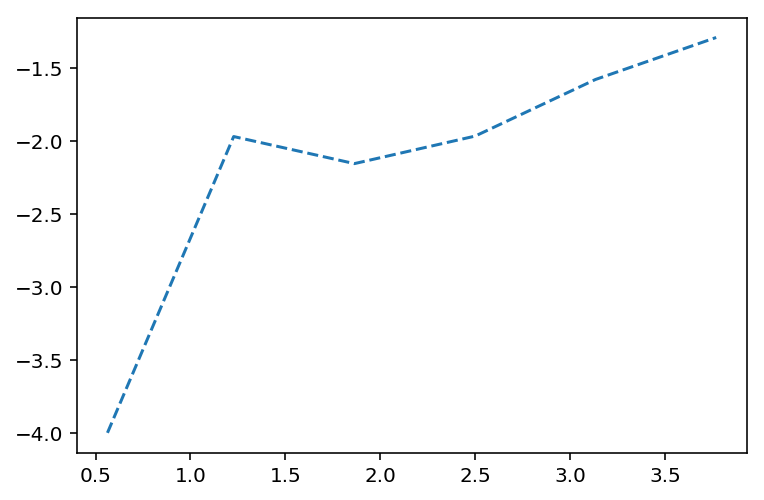

Final Prediction: 51254.278685318706 over 19.7


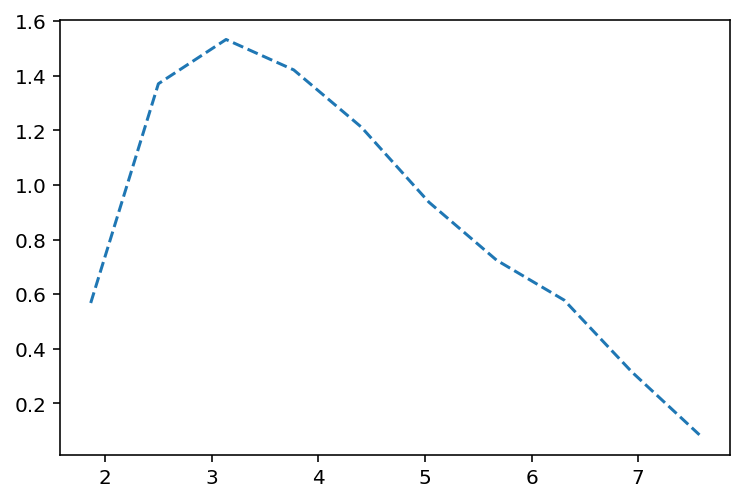

Final Prediction: 45.15803576917467 over 39.1


In [144]:
from math import e
for experiment in data.keys():
    t, temp = data[experiment]
    exp_diff = []
    t2 = []
    indexes = []
    for n, T in enumerate(temp[1:]):
        diff = (T - temp[n-1])/(t[n] - t[n-1])
        if abs(diff)>1 and abs(diff)<10:
            exp_diff.append(diff)
            t2.append(t[n])
            indexes.append(n)
    t2, exp_diff = np.array(t2).reshape(-1, 1), np.array(exp_diff).reshape(-1, 1)
    ln_exp_diff = np.log(exp_diff)
    
    regr = LinearRegression()
    try:
        regr.fit(t2, ln_exp_diff)
        const = 1
        plt.plot(t2, ln_exp_diff, '--')
        plt.show()
    except Exception as e_:
        const = -1
        ln_exp_diff = np.log(-1 * exp_diff)
        plt.plot(t2, exp_diff, '--')
        plt.show()
        regr.fit(t2, ln_exp_diff)
        
    exp_diff_pred = const * np.array(regr.predict(t2))

    n = indexes[int(len(indexes)/2)]
    k = const * regr.coef_[0][0]
    C = const * regr.predict([[0]])
    D = temp[n] - (1/k)*e**(k * t[n] + C)

    temp_pred = []
    for t in range(0,40):
        temp = (1/k)*e**(k * t + C) + D
        temp_pred.append(temp)

    print("Final Prediction:", temp_pred[-2][0][0], "over", experiment)